#1: What is Simple Linear Regression?

- Simple Linear Regression shows how one independent variable (X) affects one dependent variable (Y).
It assumes a straight-line relationship:

   𝑌==β0+β1X+ε
	​

- β0: intercept (value of Y when X = 0)

- β1: slope (how much Y changes when X increases by 1 unit)


- ε: random error term

Example: Predicting student marks (Y) from hours studied (X).

# 2: Assumptions of Linear Regression

- Linearity: Relationship between X and Y is linear.

- Independence: Observations are independent.

- Homoscedasticity: Equal variance of residuals across all X values.

- Normality of Errors: Residuals follow a normal distribution.

- No perfect multicollinearity: (for multiple regression) independent variables aren’t highly correlated.

# 3: What is Heteroscedasticity?

Heteroscedasticity means the variance of errors is not constant across observations.

- If variance increases with X (fan shape in residual plot), the data is heteroscedastic.

- It violates OLS assumptions → makes standard errors unreliable → t-tests, p-values incorrect.

Fixes:

- Use log transformation on Y or X

- Apply weighted least squares

- Use robust standard errors

# 4: What is Multiple Linear Regression?

- When Y depends on more than one variable:
  
  Y=β0​+β1​X1​+β2​X2​+...+βp​Xp​+ε
- Example: Predicting House Price (Y) using Area and Number of Rooms.

#5: Polynomial Regression

Polynomial regression models nonlinear relationships:

  Y=β0+β1X+β2X2+ε

It’s still linear in parameters but fits curved trends between X and Y.

Regression Equation: Y = 0.18 + 1.98X


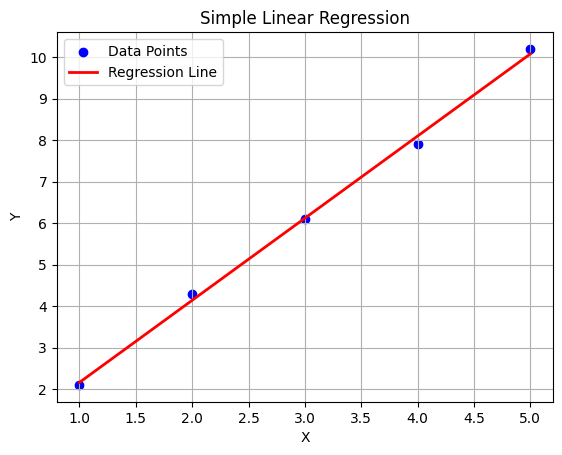

In [2]:
#6: Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predicted values
Y_pred = model.predict(X)

# Print the equation
print(f"Regression Equation: Y = {intercept:.2f} + {slope:.2f}X")

# Plot the data and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
#7: Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.

# Import required libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Given data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)
print("Sample Data:\n", df)

# Define independent and dependent variables
X = df[['Area', 'Rooms']]
y = df['Price']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display summary
print("\nRegression Model Summary:")
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) Results:")
print(vif_data)


Sample Data:
    Area  Rooms   Price
0  1200      2  250000
1  1500      3  300000
2  1800      3  320000
3  2000      4  370000

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 07 Nov 2025   Prob (F-statistic):             0.0377
Time:                        03:08:14   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Polynomial Regression Equation: Y = 0.06 + 1.94X + 0.20X²


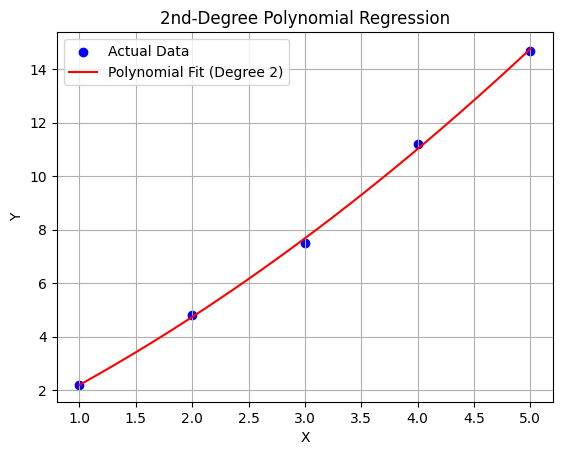

In [4]:
#8: Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Get coefficients
intercept = model.intercept_
coef1, coef2 = model.coef_

print(f"Polynomial Regression Equation: Y = {intercept:.2f} + {coef1:.2f}X + {coef2:.2f}X²")

# Predict for plotting
X_range = np.linspace(1, 5, 200).reshape(-1, 1)
Y_pred = model.predict(poly.transform(X_range))

# Plot
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_range, Y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.title("2nd-Degree Polynomial Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


Regression Equation: Y = 6.50 + 1.15X


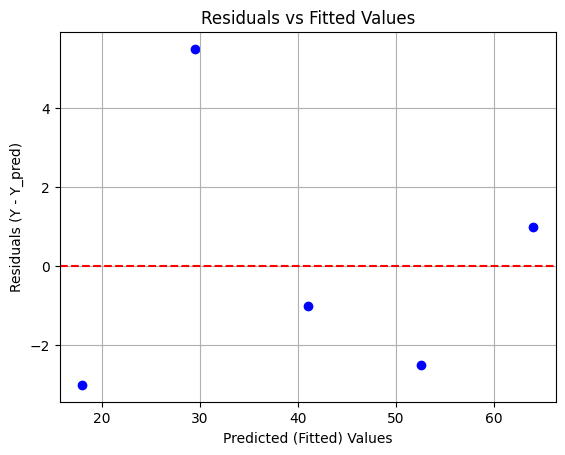

In [5]:
#9: Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Display regression equation
print(f"Regression Equation: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X")

# Create a residuals plot
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Predicted (Fitted) Values")
plt.ylabel("Residuals (Y - Y_pred)")
plt.grid(True)
plt.show()


#10: Imagine you are a data scientist working for a real estate company. Youneed to predict house prices using features like area, number of rooms, and location.However, you detect heteroscedasticity and multicollinearity in your regressionmodel. Explain the steps you would take to address these issues and ensure a robust model.

Scenario:
- You are a data scientist predicting house prices using variables such as area, number of rooms, and location.
During model evaluation, you find two common regression issues:

-  Heteroscedasticity (unequal variance of residuals)

+ Multicollinearity (predictors highly correlated with each other)

 Step 1: Detecting the Issues

#1 For Heteroscedasticity:

- Plot Residuals vs Fitted Values → check if variance increases or decreases with fitted values (fan-shaped pattern).

- Perform Breusch–Pagan or White’s test for confirmation.

#2 For Multicollinearity:

- Calculate Variance Inflation Factor (VIF) for each feature.

  - VIF > 5 → moderate multicollinearity

  - VIF > 10 → strong multicollinearity

- Check correlation matrix among predictors.

  Step 2: Fixing Heteroscedasticity

 If the error variance is not constant:

#1 Transform the target variable (Y):

- Apply a logarithmic or square root transformation (e.g., log(Price)).

- This often stabilizes the variance in price prediction models.

#2 Use Weighted Least Squares (WLS):

- Assign lower weights to observations with higher variance.

#3 Use Robust Standard Errors:

- In statsmodels, you can specify cov_type='HC3' to make inference reliable even with heteroscedasticity.

#4 Model nonlinearity explicitly:

- Sometimes variance changes due to missing nonlinear effects.
Adding polynomial or interaction terms can fix this.

 Step 3: Fixing Multicollinearity

   If predictors are highly correlated:

#1 Remove or combine correlated features:

- Example: If area and number of rooms are highly correlated, use a single derived feature such as price per square foot or area per room.

#2 Use Regularization:

- Apply Ridge Regression (L2) to reduce coefficient variance.

- Use Lasso Regression (L1) to perform feature selection automatically.

#3 Principal Component Analysis (PCA):

- Transform correlated features into a smaller set of uncorrelated components.

#4 Collect more data:

- Larger and more varied data helps reduce instability from correlated predictors.

 Step 4: Validate and Finalize the Model

- Refit the model after applying fixes.

- Check R², Adjusted R², and Residual plots again.

- Perform cross-validation to ensure stability.

- Interpret coefficients carefully — especially when using regularization.